In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import sys
sys.path.insert(1, '../../utils/')
import src_utils
import seaborn as sns

In [45]:
# Get Rosetta scores and clusters
rosetta_scores = pd.read_csv('../../utils/rosetta_scores.csv', index_col=0)
rosetta_full_scores = pd.read_csv('../../utils/rosetta_full_scores.csv', index_col=0)

clust1 = '275+287+323+325+349+368+372+374+375+377+381+384+398+401+402+404+434+440+443+444+495+503+511+512'.split('+')
clust2 = '273+274+276+283+285+286+289+290+291+292+293+294+297+300+304+326+327+329+331+334+335+413+456'.split('+')

In [46]:
# Get all positions that are in respective clusters

# Make a column for position
pos = [np.nan, np.nan] + [x[1:-1] for x in rosetta_scores.index.tolist()[2:]]
rosetta_full_scores['Position'] = pos

# Get masks for positions
clust1_bool_map = np.zeros(len(rosetta_full_scores)).astype(bool)
clust2_bool_map = np.zeros(len(rosetta_full_scores)).astype(bool)
for pos in clust1:
    pos_bool_mask = rosetta_full_scores['Position'].values == pos
    clust1_bool_map = clust1_bool_map | pos_bool_mask
    
for pos in clust2:
    pos_bool_mask = rosetta_full_scores['Position'].values == pos
    clust2_bool_map = clust2_bool_map | pos_bool_mask

# Slice score DataFrame by respective maps
clust1_rosetta_scores = rosetta_full_scores['0'][clust1_bool_map]
clust2_rosetta_scores = rosetta_full_scores['0'][clust2_bool_map]

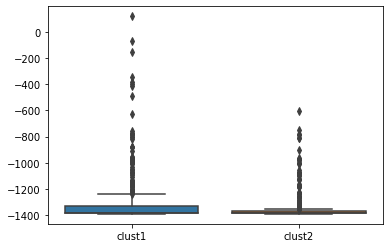

In [51]:
# Plot distributions of each
labels = (['clust1'] * len(clust1_rosetta_scores)) + (['clust2'] * len(clust2_rosetta_scores))
sns.boxplot(labels, np.concatenate((clust1_rosetta_scores, clust2_rosetta_scores)))

In [65]:
resids = pd.read_csv('../../utils/residuals.csv', index_col=0).sort_values('raw_resids')
most_dep = resids['raw_resids'][:10].index.tolist()
most_ihb = resids['raw_resids'][-10:].index.tolist()
neutral = resids['raw_resids'][1745:1755].index.tolist()

Text(0, 0.5, 'ddG (scorefxn=REF 2015)')

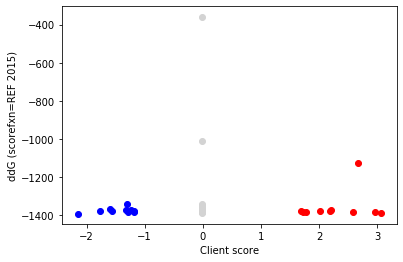

In [70]:
plt.scatter(resids.loc[most_dep, 'raw_resids'], rosetta_full_scores.loc[most_dep, '0'], c='b')
plt.scatter(resids.loc[most_ihb, 'raw_resids'], rosetta_full_scores.loc[most_ihb, '0'], c='r')
plt.scatter(resids.loc[neutral, 'raw_resids'], rosetta_full_scores.loc[neutral, '0'], c='lightgrey')
plt.xlabel('Client score')
plt.ylabel('ddG (scorefxn=REF 2015)')

In [71]:
point_muts = pd.read_csv('../../utils/point_muts.csv', index_col=0, header=[0,1])
point_muts.index = pd.read_csv('../../utils/residuals.csv', index_col=0).index

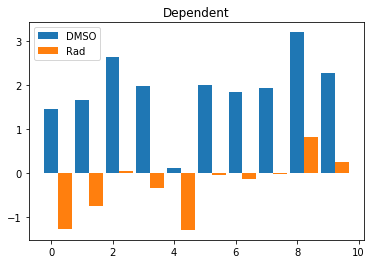

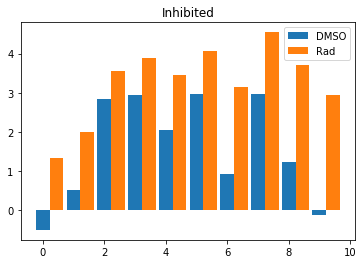

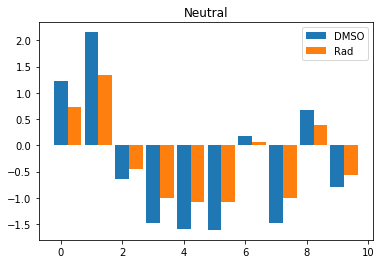

In [86]:
dmso = point_muts.loc[most_dep, ('Zero', 'score')].values
rad = point_muts.loc[most_dep, ('Radicicol', 'score')].values

bar_width = 0.45
r1 = np.arange(len(dmso))
r2 = [x + bar_width for x in r1]

plt.bar(r1, dmso, width=bar_width)
plt.bar(r2, rad, width=bar_width)
plt.legend(['DMSO', 'Rad'])
plt.title('Dependent')
plt.show()

dmso = point_muts.loc[most_ihb, ('Zero', 'score')].values
rad = point_muts.loc[most_ihb, ('Radicicol', 'score')].values

plt.bar(r1, dmso, width=bar_width)
plt.bar(r2, rad, width=bar_width)
plt.legend(['DMSO', 'Rad'])
plt.title('Inhibited')
plt.show()


dmso = point_muts.loc[neutral, ('Zero', 'score')].values
rad = point_muts.loc[neutral, ('Radicicol', 'score')].values

plt.bar(r1, dmso, width=bar_width)
plt.bar(r2, rad, width=bar_width)
plt.legend(['DMSO', 'Rad'])
plt.title('Neutral')
plt.show()


In [76]:
point_muts

condition     Radicicol                                   Zero                \
value                SE        epsilon     score            SE       epsilon   
_sy        5.335172e-02   0.000000e+00  0.025503  2.697229e-02  0.000000e+00   
_wt        0.000000e+00   0.000000e+00 -0.000000  0.000000e+00  0.000000e+00   
A296R      2.877870e-19   2.842710e-37 -1.062516  4.839518e-12  3.046323e-23   
A296N      3.237620e-19   3.576656e-37 -1.061823  2.866780e-01  6.887958e-06   
A296D      1.181331e-96  6.676056e-189 -1.133463  5.549751e-25  1.993584e-48   
...                 ...            ...       ...           ...           ...   
V478K      1.999885e-21   1.747776e-41 -1.070862  9.585315e-14  1.563468e-26   
V478M      1.038719e-02   4.127776e-06 -0.483243  2.374931e-01  2.759799e-12   
V478S      1.107723e-22   5.994830e-44 -0.597112  1.291102e-40  4.860242e-79   
V478T      1.022153e+00   0.000000e+00  0.608660  2.736734e-01  2.976509e-04   
V478Y      1.142321e-79  1.322177e-155 -0.694555  6.336936e-27  3.144420e-52   

condition            
value         score  
_sy        0.035485  
_wt       -0.000000  
A296R     -1.463224  
A296N     -1.947827  
A296D     -1.577387  
...             ...  
V478K     -1.512068  
V478M     -0.411314  
V478S     -0.580570  
V478T      0.792953  
V478Y     -0.661465  

[3501 rows x 6 columns]